# NOTEBOOK - ANALYSIS OF TITANIC PASSENGER DATA

# <font color=blue>Step 1 - Preparation of the Environment</font>

## Import the Packages

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings

## Set Parameters of the Notebook

In [2]:
warnings.filterwarnings('ignore')

In [114]:
### Personalized Palettes for Visualization
# Palette for training vs. test sets
palette_train_test = ["#FF0B04", "#4374B3"]

In [3]:
# Path to data
path_data = "../../data/data_titanic/"

# <font color=blue>Step 2 - Loading of the Data</font>

## Training Data Set

In [63]:
df_train = pd.read_csv(path_data + 'train.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Test Data Set

In [64]:
df_test = pd.read_csv(path_data + 'test.csv')

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# <font color=blue>Step 3 - Preliminary Inspection and Processing of the Data Sets</font>

## Check 1 - Columns Information

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Check 2 - Range of Age TO REMOVE

Check for:
- Negative age
- Age above 100

In [8]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

## Check 3 - Range of Fare TO REMOVE
Check for:
- Negative fare

In [10]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [11]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

## Check 4 - Duplicate Passenger ID

In [12]:
sum(df_train.duplicated(subset = 'PassengerId'))

0

In [13]:
sum(df_test.duplicated(subset = 'PassengerId'))

0

## Check 5 - Duplicate Ticket ID

In [14]:
sum(df_train.duplicated(subset = 'Ticket'))

210

In [15]:
sum(df_test.duplicated(subset = 'Ticket'))

55

## Initial Data Processing

#### Turn Pclass column into a categorical variable

In [16]:
df_train['Pclass'] = df_train['Pclass'].astype('object')
df_test['Pclass'] = df_test['Pclass'].astype('object')

# <font color=blue>Step 4 - Exploratory Data Analysis on Training and Test Sets</font>

In [18]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
df_train[df_train['Cabin']=='B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [20]:
df_train[df_train['Cabin']=='C23 C25 C27']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [21]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

## Univariate Analysis

### Prepare Function for Analysis

In [115]:
def func_eda_univ_cat(var_name, df_train_input, df_test_input, return_viz = True, handle_na = True):
    """
    """
    
    ### Copy Input Dataframes
    df_train = df_train_input.copy()
    df_test = df_test_input.copy()
    
    ### Account for Missing Values
    if handle_na:
        df_train[var_name] = df_train[var_name].fillna("Missing_Cat")
        df_test[var_name] = df_test[var_name].fillna("Missing_Cat")
    
    ### Get the Total Number of Categories of the Variable
    list_cat = list(set(list(df_train[var_name].unique()) + list(df_test[var_name].unique())))
    
    ### Get Count and Proportion of Each Category
    # Initiate result table
    table_result = pd.DataFrame()

    # Loop over each category
    for cat_id in list_cat:
        # Initiate result for the class
        dict_result = {}
        # Fill the dictionary
        dict_result['Category'] = cat_id
        dict_result['Count_Train'] = sum(df_train[var_name] == cat_id)
        dict_result['Perc_Train'] = np.round(sum(df_train[var_name] == cat_id) / df_train[var_name].shape[0] * 100, 2)
        dict_result['Count_Test'] = sum(df_test[var_name] == cat_id)
        dict_result['Perc_Test'] = np.round(sum(df_test[var_name] == cat_id) / df_test[var_name].shape[0] * 100, 2)
        # Add result to final table
        dict_result = pd.DataFrame.from_dict(dict_result, orient='index').T
        table_result = table_result.append(dict_result)
        
        
    ### Visualize Data
    if return_viz:
        
        ### Prepare Table for Visualization
        # Copy result table
        table_viz = table_result.copy()
        # Select relevant columns
        table_viz = table_viz[['Category', 'Perc_Train', 'Perc_Test']]
        # Melt table
        table_viz = pd.melt(table_viz, id_vars = ['Category'], value_vars = ['Perc_Train', 'Perc_Test'], 
                           var_name = 'Set', value_name = 'Percentage')
        # Rename category
        table_viz['Set'] = np.where(table_viz['Set'] == 'Perc_Train', 'Training Set', 'Test Set')
        
        ### Run Visualization
        plt.figure(figsize = (8,3))
        sns.barplot(x = 'Category', y='Percentage', hue = 'Set', data = table_viz, palette = palette_train_test)
        plt.title(f'Percentage of Passengers by {var_name}')
        plt.show()
        
        
    return table_result
    

### Passenger Class

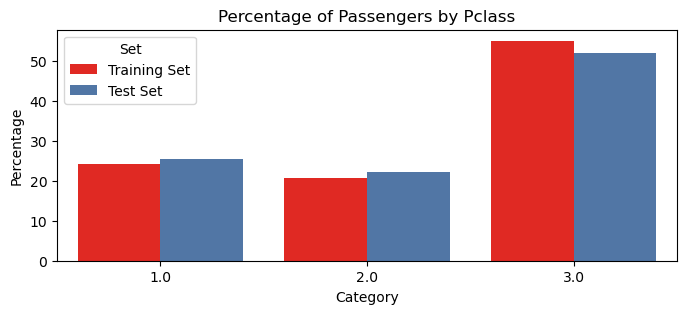

,Category,Count_Train,Perc_Train,Count_Test,Perc_Test
0,1.0,216.0,24.24,107.0,25.60
0,2.0,184.0,20.65,93.0,22.25
0,3.0,491.0,55.11,218.0,52.15


In [116]:
table_class = func_eda_univ_cat('Pclass', df_train, df_test)

table_class

### Sex Category

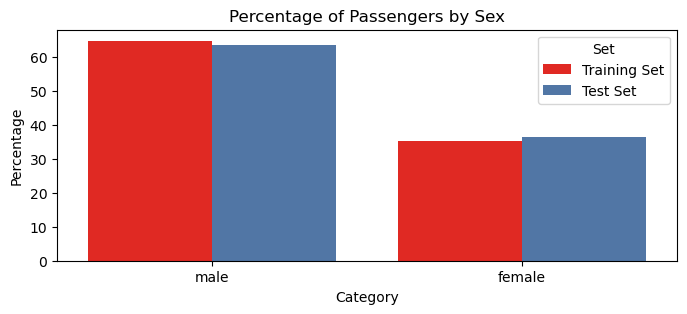

,Category,Count_Train,Perc_Train,Count_Test,Perc_Test
0,male,577,64.76,266,63.64
0,female,314,35.24,152,36.36


In [117]:
table_sex = func_eda_univ_cat('Sex', df_train, df_test)

table_sex

### Port of Embarkation

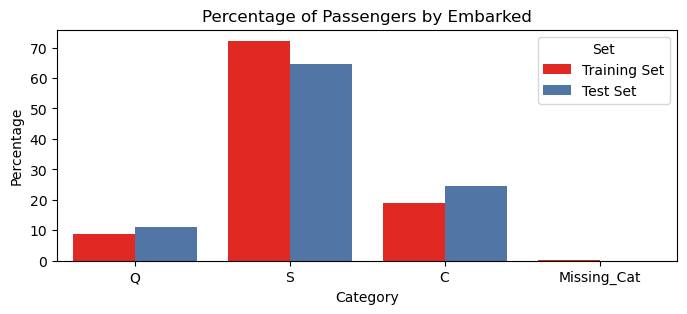

,Category,Count_Train,Perc_Train,Count_Test,Perc_Test
0,Q,77,8.64,46,11.0
0,S,644,72.28,270,64.59
0,C,168,18.86,102,24.4
0,Missing_Cat,2,0.22,0,0.0


In [118]:
table_port = func_eda_univ_cat('Embarked', df_train, df_test)

table_port

### Age

#### Statistics

In [27]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
df_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

#### Visualization

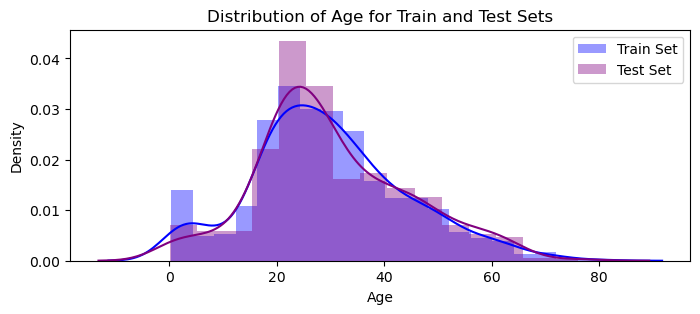

In [53]:
plt.figure(figsize =(8,3))
sns.distplot(df_train['Age'], color = 'blue', label = 'Train Set')
sns.distplot(df_test['Age'], color = 'purple', label = 'Test Set')
plt.legend()
plt.title("Distribution of Age for Train and Test Sets")
plt.show()

### Fare

In [41]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [42]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

#### Visualization

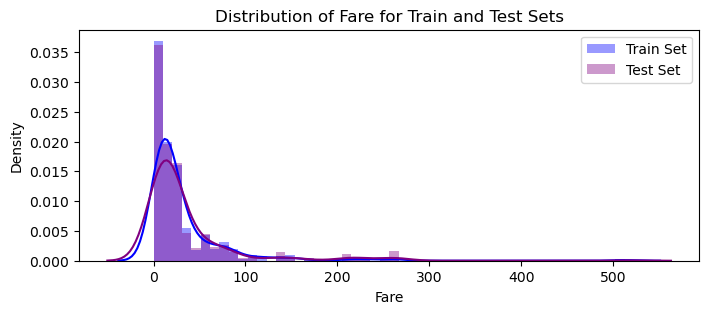

In [55]:
plt.figure(figsize =(8,3))
sns.distplot(df_train['Fare'], color = 'blue', label = 'Train Set')
sns.distplot(df_test['Fare'], color = 'purple', label = 'Test Set')
plt.legend()
plt.title("Distribution of Fare for Train and Test Sets")
plt.show()

### Family Onboard

#### Siblings

#### Parents

## Multivariate Analysis

# <font color=blue>Step 5 - Exploratory Data Anlysis on Training Set Only</font>

Deep dive on the training data set by introducing the target variable Survived and assessing its relation with the explanatory variables of the data set

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


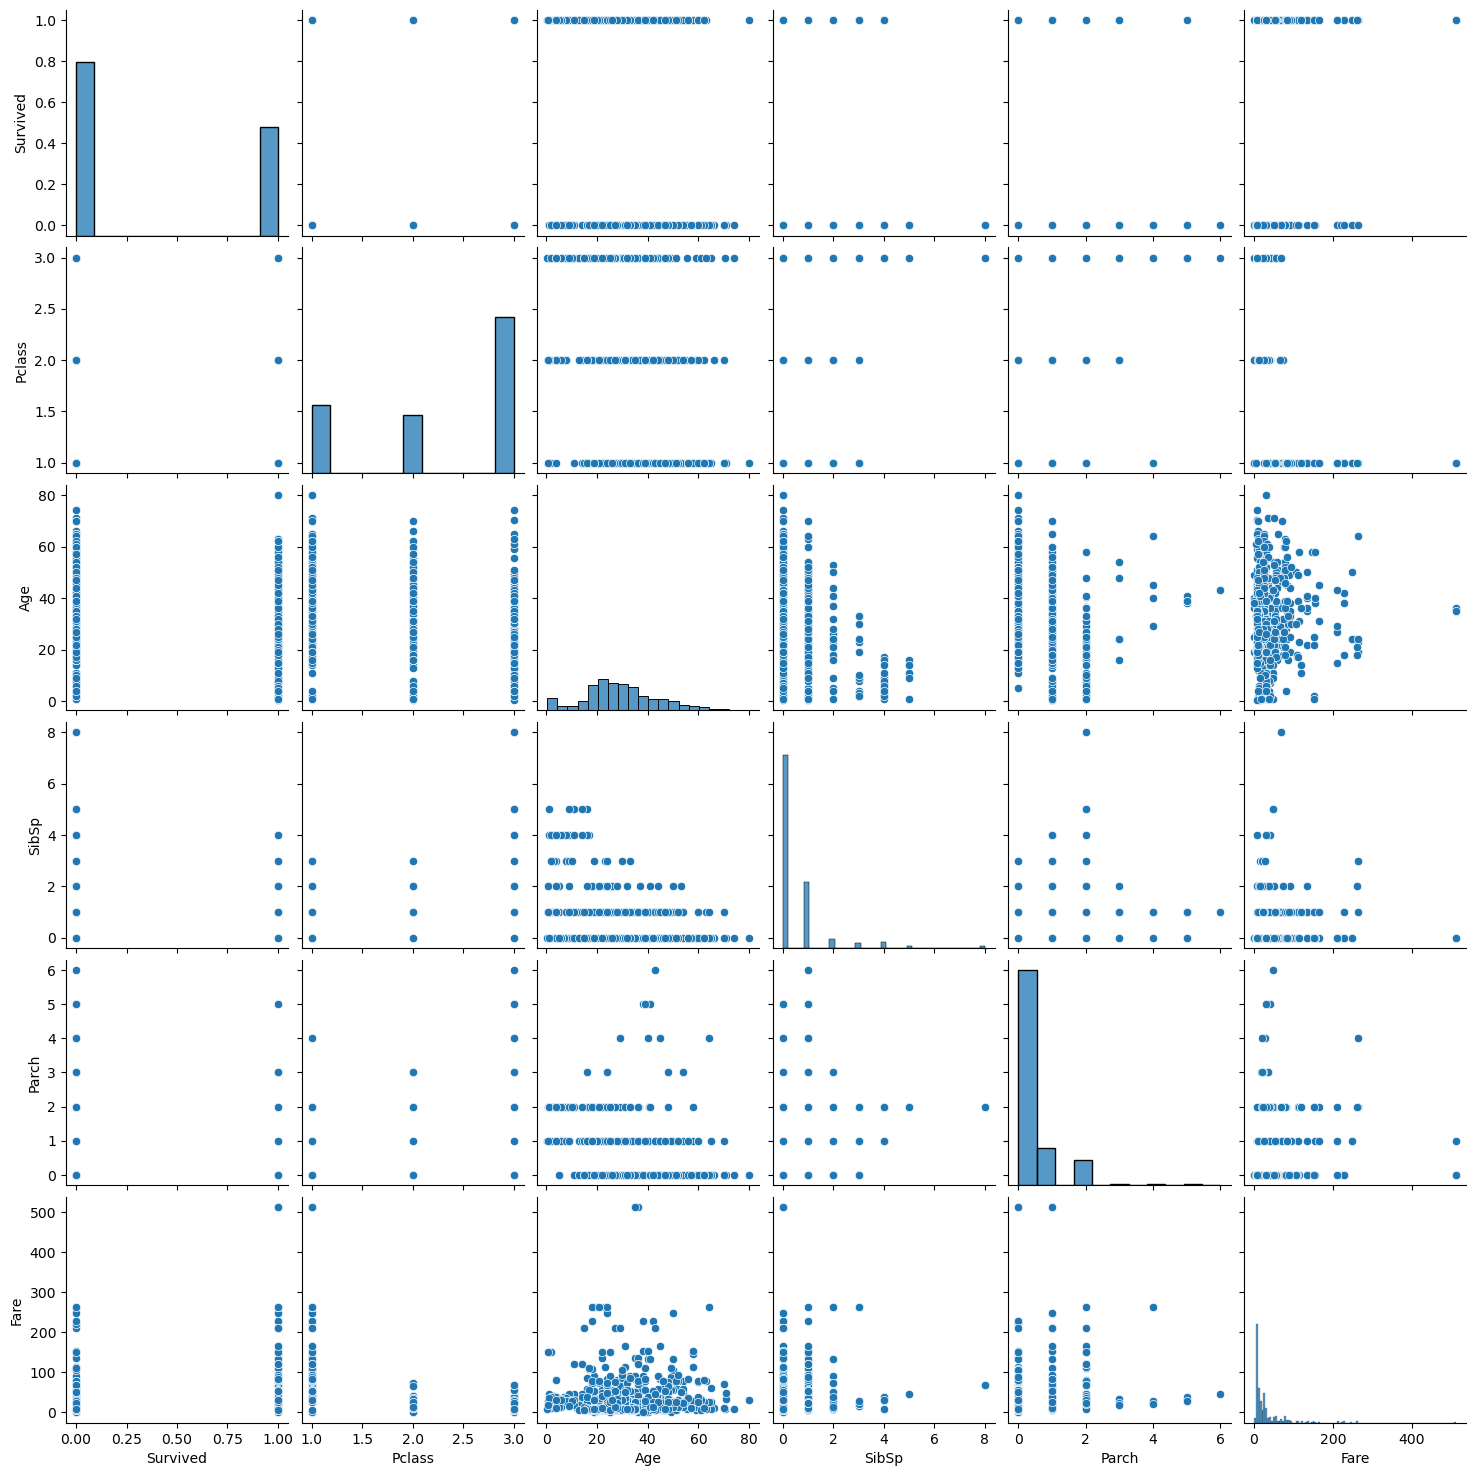

In [48]:
list_col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

corr_mat = df_train[list_col].corr()

sns.pairplot(df_train[list_col])
plt.show()